In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
animes_df = pd.read_csv('animes.csv')

In [3]:
animes_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [4]:
# CHECKING FOR NULL VALUES
animes_df.isnull().sum()

uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64

In [5]:
# REMOVING COLUMNS
animes_df = animes_df[['genre', 'aired', 'popularity']]


In [6]:
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       19311 non-null  object
 1   aired       19311 non-null  object
 2   popularity  19311 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 452.7+ KB


In [7]:
animes_df.describe()

,popularity
count,19311.000000
mean,7720.830304
std,4676.786104
min,1.000000
25%,3725.000000
50%,7539.000000
75%,11613.000000
max,16338.000000


In [8]:
df = animes_df.copy()
df

,genre,aired,popularity
0,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",141
1,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",28
2,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",98
3,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",4
4,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",502
...,...,...,...
19306,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",843
19307,"['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",1292
19308,"['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",1314
19309,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1469


In [9]:
# Create an empty list to store the separated data
separated_data_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Split the genres in the current row into a list
    genres_list = row['genre'].strip('[]').replace("'", "").split(', ')
    
    # Iterate over each genre in the genres list
    for genre in genres_list:
        # Append a new row to the separated_data_rows list with the genre, aired, and popularity values from the current row
        separated_data_rows.append({'Genre': genre, 'Aired': row['aired'], 'Popularity': row['popularity']})

# Convert the list of rows into a DataFrame
separated_data = pd.DataFrame(separated_data_rows)

# Now you have a DataFrame with each genre separated into new rows and their respective 'aired' and 'popularity' values
print(separated_data)

          Genre                        Aired  Popularity
0        Comedy  Oct 4, 2015 to Mar 27, 2016         141
1        Sports  Oct 4, 2015 to Mar 27, 2016         141
2         Drama  Oct 4, 2015 to Mar 27, 2016         141
3        School  Oct 4, 2015 to Mar 27, 2016         141
4       Shounen  Oct 4, 2015 to Mar 27, 2016         141
...         ...                          ...         ...
55658  Military                 Mar 12, 1988        2604
55659    Sci-Fi                 Mar 12, 1988        2604
55660     Space                 Mar 12, 1988        2604
55661     Drama                 Mar 12, 1988        2604
55662     Mecha                 Mar 12, 1988        2604

[55663 rows x 3 columns]


In [10]:
separated_data['Genre'].unique() 

array(['Comedy', 'Sports', 'Drama', 'School', 'Shounen', 'Music',
       'Romance', 'Sci-Fi', 'Adventure', 'Mystery', 'Fantasy', 'Action',
       'Military', 'Magic', 'Supernatural', 'Vampire', 'Slice of Life',
       'Demons', 'Historical', 'Super Power', 'Mecha', 'Parody',
       'Samurai', 'Seinen', 'Police', 'Psychological', 'Josei', 'Space',
       'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror', 'Shounen Ai',
       'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia', 'Harem',
       '', 'Hentai', 'Yaoi', 'Yuri'], dtype=object)

In [11]:
separated_data = separated_data[separated_data['Genre'] != '']
separated_data['Genre'].unique() 

array(['Comedy', 'Sports', 'Drama', 'School', 'Shounen', 'Music',
       'Romance', 'Sci-Fi', 'Adventure', 'Mystery', 'Fantasy', 'Action',
       'Military', 'Magic', 'Supernatural', 'Vampire', 'Slice of Life',
       'Demons', 'Historical', 'Super Power', 'Mecha', 'Parody',
       'Samurai', 'Seinen', 'Police', 'Psychological', 'Josei', 'Space',
       'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror', 'Shounen Ai',
       'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia', 'Harem',
       'Hentai', 'Yaoi', 'Yuri'], dtype=object)

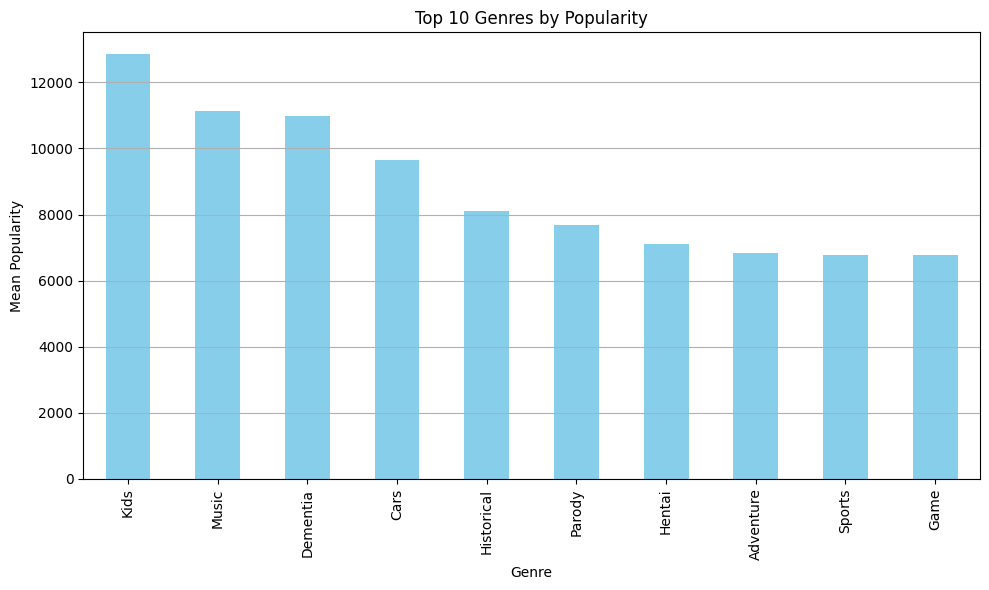

In [12]:
# Group the data by genre and calculate the mean popularity for each genre
genre_popularity = separated_data.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)

# Select the top 10 genres by popularity
top_10_genre_popularity = genre_popularity.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


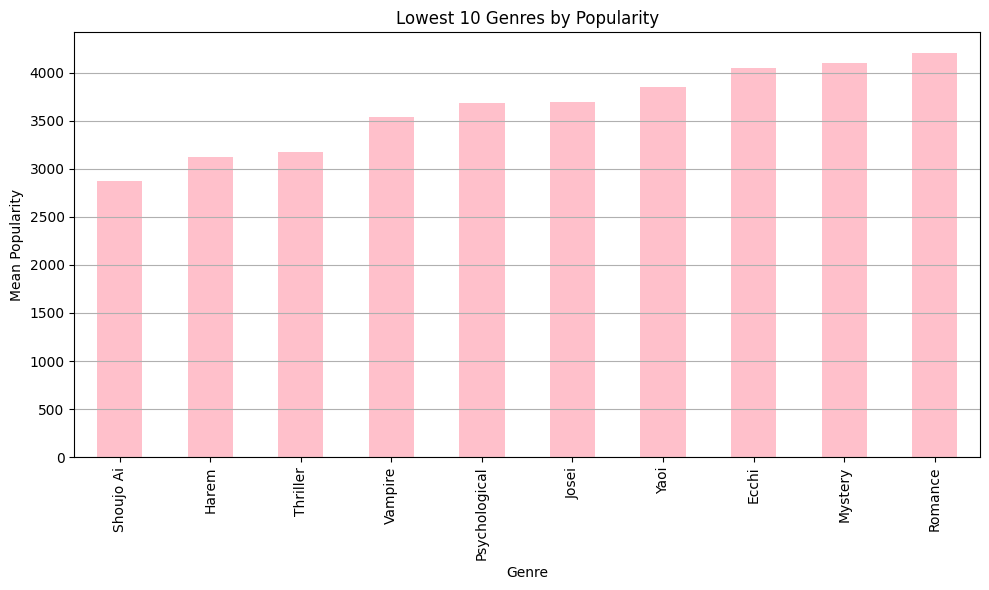

In [13]:
# Group the data by genre and calculate the mean popularity for each genre
genre_popularity = separated_data.groupby('Genre')['Popularity'].mean().sort_values(ascending=True)

# Select the Lowest 10 genres by popularity
top_10_genre_popularity = genre_popularity.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_genre_popularity.plot(kind='bar', color='pink')
plt.title('Lowest 10 Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

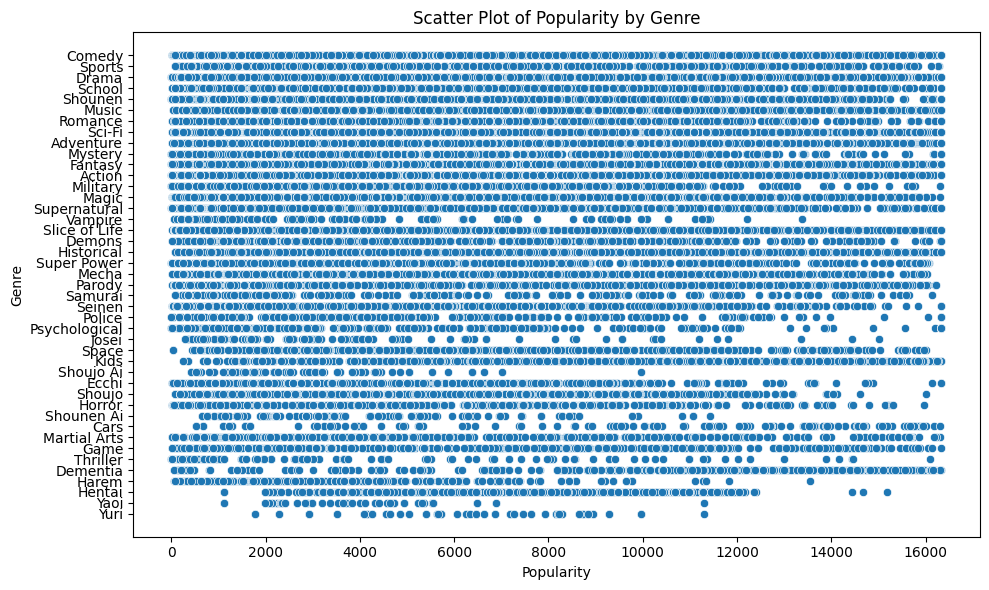

In [14]:
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Genre', data=separated_data)
plt.title('Scatter Plot of Popularity by Genre')
plt.tight_layout()
plt.show()

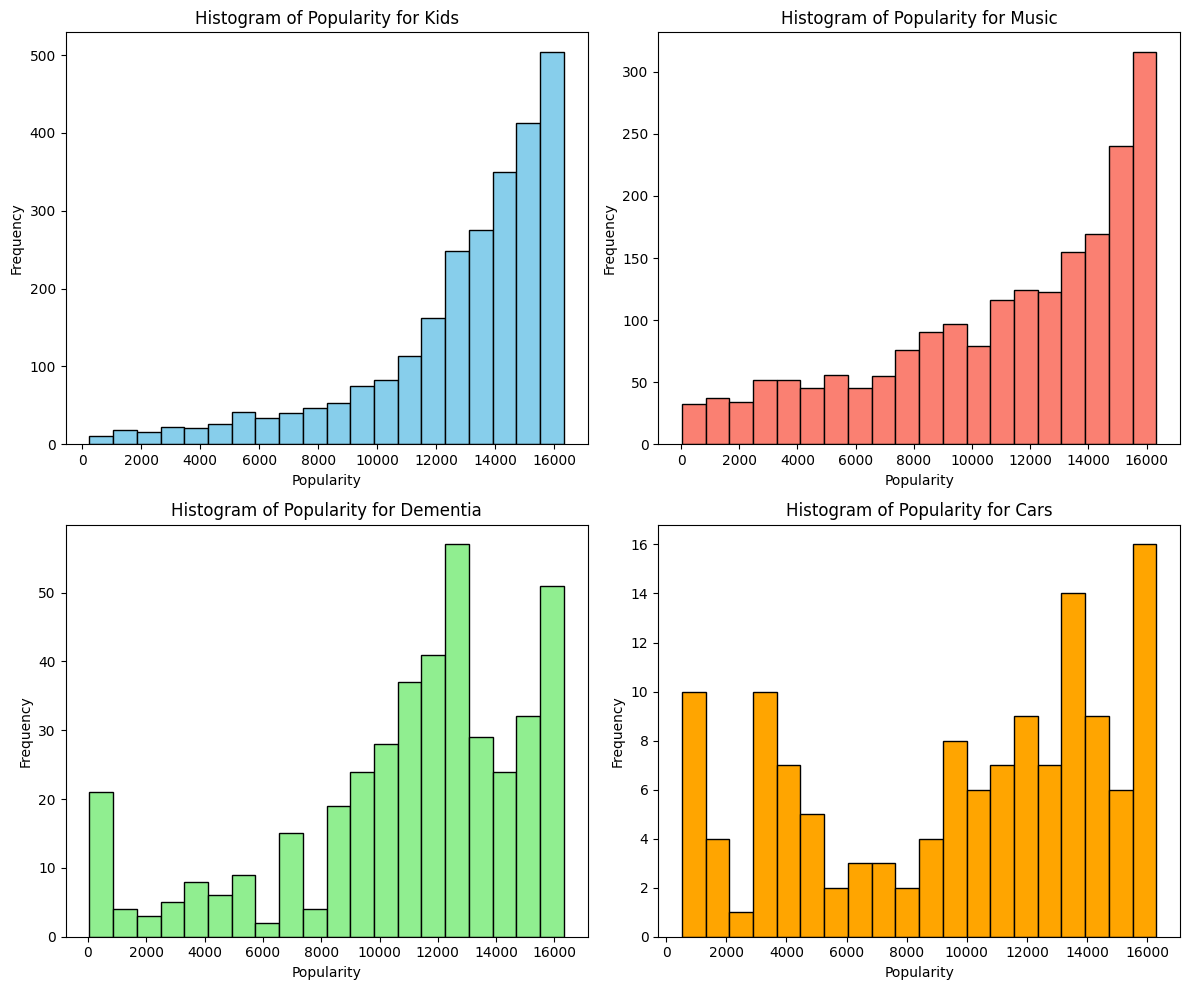

In [19]:
# Calculate the mean popularity for each genre
genre_popularity = separated_data.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)

# Select the top 4 genres
top_genres = genre_popularity.head(4)

# Define colors for each genre
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each genre with different colors
for i, (genre, mean_popularity) in enumerate(top_genres.items()):
    ax = axes[i//2, i%2]
    genre_data = separated_data[separated_data['Genre'] == genre]
    ax.hist(genre_data['Popularity'], bins=20, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of Popularity for {genre}')
    ax.set_xlabel('Popularity')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [131]:
# REMOVING UNWANTED CHARACTERS
separated_data['Aired'] = separated_data['Aired'].str.split(' to').str[0]

In [135]:
separated_data['Aired'].unique().sum()

'Oct 4, 2015Oct 10, 2014Jul 7, 2017Apr 5, 2009Jan 6, 2017Jan 7, 2019Jul 20, 2001Apr 6, 2019Aug 12, 2017Apr 6, 2008Oct 8, 2016Jan 9, 2017Jul 6, 2013Apr 4, 2006Oct 3, 2008Oct 4, 2012Oct 5, 2015Nov 23, 2013Jul 12, 2008Apr 7, 2010Apr 16, 2010Dec 17, 2005Feb 17, 2014Oct 3, 1977Sep 20, 2017Jan 29, 2014Jan 19, 2010Apr 3, 2009Dec 20, 2003Oct 23, 2010Sep 18, 2015Nov 11, 2017Sep 27, 2019Sep 24, 2014Jan 9, 2016Jan 9, 2019Mar 7, 1999Mar 3, 2007Apr 14, 2010Mar 3, 2018Jun 9, 2018Mar 11, 2016Aug 2, 2017Feb 25, 2017Aug 9, 1986Jun 16, 2012Oct 12, 2019Oct 14, 2005Dec 31, 2018Sep 26, 2008Apr 8, 2003Mar 6, 2004Feb 7, 2010Jul 4, 2008Sep 14, 1978Oct 7, 2013Oct 4, 2006Jan 7, 2018Apr 12, 2019Oct 5, 2004Jul 7, 2015Jul 9, 2016Jan 7, 2003Dec 9, 2013Jan 3, 2009Oct 26, 2016Jun 24, 2016Jan 8, 2018Apr 11, 2008Oct 5, 2019Jan 25, 2018Jul 5, 2015Oct 4, 2005Jan 22, 2011Jun 14, 2019Oct 1, 2018Jan 5, 2014Apr 4, 1997Jul 11, 2001Aug 1, 1998Apr 3, 2008Jul 8, 2012Aug 25, 2002Oct 29, 2014Mar 8, 2014Jul 3, 2015Oct 7, 2003Oct 17